In [1]:
import pandas as pd
import numpy as np 
import datetime as dt
import dask.array as da
import dask.dataframe as dd 

In [2]:
# Cast datatypes for start_lat, start_lng, end_lat % end_lng to float32 in order to save memory.
dtypes = {'ride_id' : 'object',
         'rideable_type' : 'object',
         'started_at' : 'object',
         'ended_at' : 'object',
         'start_station_name' : 'object',
         'start_station_id' : 'object',
         'end_station_name' : 'object',
         'end_station_id' : 'object',
         'start_lat' : 'float32',
         'start_lng' : 'float32',
         'end_lat' : 'float32',
         'end_lng' : 'float32',
         'member_casual' : 'object'
}

# Load/Import the data using read_csv()
data_202205 = dd.read_csv('..\\Cyclistic_Data\\202205_divvy_tripdata.csv', dtype=dtypes).compute()
data_202206 = dd.read_csv('..\\Cyclistic_Data\\202206_divvy_tripdata.csv', dtype=dtypes).compute()
data_202207 = dd.read_csv('..\\Cyclistic_Data\\202207_divvy_tripdata.csv', dtype=dtypes).compute()
data_202208 = dd.read_csv('..\\Cyclistic_Data\\202208_divvy_tripdata.csv', dtype=dtypes).compute()
data_202209 = dd.read_csv('..\\Cyclistic_Data\\202209_divvy_tripdata.csv', dtype=dtypes).compute()
data_202210 = dd.read_csv('..\\Cyclistic_Data\\202210_divvy_tripdata.csv', dtype=dtypes).compute()
data_202211 = dd.read_csv('..\\Cyclistic_Data\\202211_divvy_tripdata.csv', dtype=dtypes).compute()
data_202212 = dd.read_csv('..\\Cyclistic_Data\\202212_divvy_tripdata.csv', dtype=dtypes).compute()
data_202301 = dd.read_csv('..\\Cyclistic_Data\\202301_divvy_tripdata.csv', dtype=dtypes).compute()
data_202302 = dd.read_csv('..\\Cyclistic_Data\\202302_divvy_tripdata.csv', dtype=dtypes).compute()
data_202303 = dd.read_csv('..\\Cyclistic_Data\\202303_divvy_tripdata.csv', dtype=dtypes).compute()
data_202304 = dd.read_csv('..\\Cyclistic_Data\\202304_divvy_tripdata.csv', dtype=dtypes).compute()

In [3]:
# .Columns function will allow us to ensure all column names are consistent within each dataset
data_202205.columns
data_202206.columns
data_202207.columns
data_202208.columns
data_202209.columns
data_202210.columns
data_202211.columns
data_202212.columns
data_202301.columns
data_202302.columns
data_202303.columns
data_202304.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
#Combine the datasets vertically using concat()
all_data_v1 = pd.concat([data_202205, data_202206, data_202207, data_202208,
                           data_202209, data_202210, data_202211, data_202212,
                           data_202301, data_202302, data_202303, data_202304])
all_data_v1.head(13)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891464,-87.626762,41.943668,-87.648949,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880959,-87.616745,41.886349,-87.617516,member
2,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882240,-87.641068,41.907654,-87.672554,member
3,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882240,-87.641068,41.884575,-87.631889,member
4,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882240,-87.641068,41.885780,-87.651024,member
5,C0A3AA5A614DCE01,classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,Carpenter St & Huron St,13196,Sangamon St & Washington Blvd,13409,41.894554,-87.653450,41.883163,-87.651100,member
6,F2AF43A242DF4555,classic_bike,2022-05-27 12:41:48,2022-05-27 12:50:41,Noble St & Milwaukee Ave,13290,Wood St & Augusta Blvd,657,41.900681,-87.662598,41.899181,-87.672203,member
7,377BE1F5F0E399CA,docked_bike,2022-05-29 19:19:24,2022-05-29 19:31:34,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Clybourn Ave,TA1309000030,41.929142,-87.649078,41.920773,-87.663712,casual
8,B136E0C969773F59,classic_bike,2022-05-16 17:48:44,2022-05-16 18:05:26,Clinton St & Madison St,TA1305000032,Clybourn Ave & Division St,TA1307000115,41.882240,-87.641068,41.904613,-87.640549,member
9,75F6A50A05E0AA18,electric_bike,2022-05-11 07:29:29,2022-05-11 07:30:57,Southport Ave & Waveland Ave,13235,N Southport Ave & W Newport Ave,20257.0,41.948067,-87.664009,41.939999,-87.660004,member


In [5]:
all_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859061 entries, 0 to 426589
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float32
 9   start_lng           float32
 10  end_lat             float32
 11  end_lng             float32
 12  member_casual       object 
dtypes: float32(4), object(9)
memory usage: 536.4+ MB


In [6]:
#Convert the started_at and ended_at columns from an object to date/time format using datetime() function
all_data_v1['started_at'] = dd.to_datetime(all_data_v1['started_at'])
all_data_v1['ended_at'] = dd.to_datetime(all_data_v1['ended_at'])
all_data_v1.info()
all_data_v1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5859061 entries, 0 to 426589
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       object        
dtypes: datetime64[ns](2), float32(4), object(7)
memory usage: 536.4+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891464,-87.626762,41.943668,-87.648949,member
1,1C31AD03897EE385,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880959,-87.616745,41.886349,-87.617516,member
2,1542FBEC830415CF,classic_bike,2022-07-09 21:28:23,2022-07-09 21:37:49,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882240,-87.641068,41.907654,-87.672554,member
3,6FF59852924528F8,classic_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882240,-87.641068,41.884575,-87.631889,member
4,483C52CAAE12E3AC,classic_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882240,-87.641068,41.885780,-87.651024,member


In [7]:
#Checking the number of null values in the dataframe per column
print(all_data_v1.isnull().sum())
print(all_data_v1.count())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    832009
start_station_id      832141
end_station_name      889661
end_station_id        889802
start_lat                  0
start_lng                  0
end_lat                 5973
end_lng                 5973
member_casual              0
dtype: int64
ride_id               5859061
rideable_type         5859061
started_at            5859061
ended_at              5859061
start_station_name    5027052
start_station_id      5026920
end_station_name      4969400
end_station_id        4969259
start_lat             5859061
start_lng             5859061
end_lat               5853088
end_lng               5853088
member_casual         5859061
dtype: int64


In [8]:
#Checking for any duplicated values within the dataframe
print(all_data_v1.duplicated().sum())

0


In [9]:
#Creating a new dataframe with dropped null/na values
all_data_v2 = all_data_v1.dropna()

In [10]:
#Checking to see if any null/na values still exist
print(all_data_v2.isnull().sum())
print(all_data_v1.count())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64
ride_id               5859061
rideable_type         5859061
started_at            5859061
ended_at              5859061
start_station_name    5027052
start_station_id      5026920
end_station_name      4969400
end_station_id        4969259
start_lat             5859061
start_lng             5859061
end_lat               5853088
end_lng               5853088
member_casual         5859061
dtype: int64


In [11]:
#Creating a ride_length column using the assign() function and converting it to show time difference in minutes using the Timedelta function
all_data_v3 = all_data_v2.assign(ride_length = (all_data_v2['ended_at'] - all_data_v2['started_at'])/dt.timedelta(minutes=1))
all_data_v3.info()
all_data_v3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533999 entries, 0 to 426589
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       object        
 13  ride_length         float64       
dtypes: datetime64[ns](2), float32(4), float64(1), object(7)
memory usage: 449.7+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891464,-87.626762,41.943668,-87.648949,member,33.350000
1,1C31AD03897EE385,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880959,-87.616745,41.886349,-87.617516,member,11.750000
2,1542FBEC830415CF,classic_bike,2022-07-09 21:28:23,2022-07-09 21:37:49,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882240,-87.641068,41.907654,-87.672554,member,9.433333
3,6FF59852924528F8,classic_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882240,-87.641068,41.884575,-87.631889,member,2.300000
4,483C52CAAE12E3AC,classic_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882240,-87.641068,41.885780,-87.651024,member,7.516667


In [12]:
#Checking for negative values in ride_length column
len(all_data_v3[all_data_v3['ride_length'] < 0])

78

In [13]:
#Remove the 78 rows with negative ride_length values by creating a new dataframe where ride_length is set to >= 0
all_data_v4 = all_data_v3[all_data_v3['ride_length'] >= 0]
all_data_v4.info()
all_data_v4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533921 entries, 0 to 426589
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       object        
 13  ride_length         float64       
dtypes: datetime64[ns](2), float32(4), float64(1), object(7)
memory usage: 449.7+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891464,-87.626762,41.943668,-87.648949,member,33.350000
1,1C31AD03897EE385,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880959,-87.616745,41.886349,-87.617516,member,11.750000
2,1542FBEC830415CF,classic_bike,2022-07-09 21:28:23,2022-07-09 21:37:49,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882240,-87.641068,41.907654,-87.672554,member,9.433333
3,6FF59852924528F8,classic_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882240,-87.641068,41.884575,-87.631889,member,2.300000
4,483C52CAAE12E3AC,classic_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882240,-87.641068,41.885780,-87.651024,member,7.516667


In [14]:
#Add Month, Week and Day columns
all_data_v5 = all_data_v4.assign(trip_month = all_data_v4['started_at'].dt.strftime("%B-%y"), trip_week = all_data_v4['started_at'].dt.strftime("%U-%b"),trip_day = all_data_v4['started_at'].dt.strftime("%A"))
all_data_v5.info()
all_data_v5.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533921 entries, 0 to 426589
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float32       
 9   start_lng           float32       
 10  end_lat             float32       
 11  end_lng             float32       
 12  member_casual       object        
 13  ride_length         float64       
 14  trip_month          object        
 15  trip_week           object        
 16  trip_day            object        
dtypes: datetime64[ns](2), float32(4), float64(1), object(10)
memory usage: 553.5+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,trip_month,trip_week,trip_day
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891464,-87.626762,41.943668,-87.648949,member,33.350000,May-22,21-May,Monday
1,1C31AD03897EE385,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880959,-87.616745,41.886349,-87.617516,member,11.750000,July-22,27-Jul,Tuesday
2,1542FBEC830415CF,classic_bike,2022-07-09 21:28:23,2022-07-09 21:37:49,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.882240,-87.641068,41.907654,-87.672554,member,9.433333,July-22,27-Jul,Saturday
3,6FF59852924528F8,classic_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.882240,-87.641068,41.884575,-87.631889,member,2.300000,March-23,11-Mar,Thursday
4,483C52CAAE12E3AC,classic_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.882240,-87.641068,41.885780,-87.651024,member,7.516667,August-22,32-Aug,Sunday


In [15]:
#Summarize statistics: mean, standard deviation, median, min and max ride lengths to see how long users use the bikes
summary_stats = all_data_v5.groupby('member_casual')['ride_length'].describe().reset_index()
summary_stats.head()

,member_casual,count,mean,std,min,25%,50%,75%,max
0,casual,1791084.0,18.972493,176.535336,0.0,5.600000,9.90,17.733333,34208.116667
1,member,2742837.0,19.206836,180.318695,0.0,5.683333,10.05,18.050000,41387.250000


In [16]:
#Find out how many users are keeping the bikes for a period greater than 24 hours
long_usage = all_data_v5[all_data_v5['ride_length'] > 1440]
summary_stats_long_usage = long_usage.groupby(['member_casual']).size()
summary_stats_long_usage = summary_stats_long_usage.to_frame(name='number of users >24h').reset_index()
print(summary_stats_long_usage)

  member_casual  number of users >24h
0        casual                  1733
1        member                  2622


- Cyclistic members are approx. 66% more likely to keep the bikes for a period greater than 24 hours and will typically ride the bikes on longer commutes than casual members. 

In [17]:
#Create a station_list dataset for data visualization
stations_list = all_data_v5[['start_station_name','start_lat','start_lng']]
stations_list = stations_list.drop_duplicates(subset='start_station_name')
stations_list

,start_station_name,start_lat,start_lng
0,Wabash Ave & Grand Ave,41.891464,-87.626762
1,DuSable Lake Shore Dr & Monroe St,41.880959,-87.616745
2,Clinton St & Madison St,41.882240,-87.641068
5,Carpenter St & Huron St,41.894554,-87.653450
6,Noble St & Milwaukee Ave,41.900681,-87.662598
...,...,...,...
303211,Public Rack - Ashland Ave & 73rd St,41.759998,-87.660004
316204,Public Rack - Ewing Ave & 106th St NW,41.700001,-87.540001
351806,Public Rack - Brandon Ave & 91st St,41.730000,-87.550003
361244,Kedzie Ave & 24th St (Temp),41.848190,-87.705414


In [18]:
stations_list.to_csv("C:\\Users\Xavier Simmons\\Desktop\\most_popular_stations_all_users.txt",index=False,sep="\t")

In [19]:
#Most popular stations amongst members
member = all_data_v5[all_data_v5['member_casual'] == 'member']
total_start_stations_member = member.groupby(['start_station_name']).size()
total_start_stations_member = total_start_stations_member.to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
total_start_stations_member = total_start_stations_member.head(10)

#Merge member dataset with stations list to get lat/long info
total_start_stations_member_top10 = pd.merge(left=total_start_stations_member, right=stations_list,
                                             on='start_station_name', how='left')
total_start_stations_member_top10.head(10)

,start_station_name,number_of_starts,start_lat,start_lng
0,Kingsbury St & Kinzie St,23814,41.889175,-87.638504
1,Clark St & Elm St,21656,41.902973,-87.631279
2,Clinton St & Washington Blvd,20467,41.883537,-87.641342
3,Wells St & Concord Ln,20225,41.912132,-87.634659
4,Loomis St & Lexington St,19831,41.872189,-87.661499
5,University Ave & 57th St,19663,41.791477,-87.599899
6,Ellis Ave & 60th St,19516,41.785099,-87.601074
7,Clinton St & Madison St,18333,41.882240,-87.641068
8,Wells St & Elm St,18221,41.903034,-87.634743
9,Broadway & Barry Ave,16817,41.937584,-87.644096


In [20]:
total_start_stations_member_top10.to_csv("C:\\Users\\Xavier Simmons\\Desktop\\top_10_popular_stations_members.txt",index=False,sep="\t")

In [21]:
#Repeat same code as above but this time for casual users
casual = all_data_v5[all_data_v5['member_casual'] == 'casual']
total_start_stations_casual = casual.groupby(['start_station_name']).size()
total_start_stations_casual = total_start_stations_casual.to_frame(name='number_of_starts').reset_index().sort_values(by='number_of_starts', ascending=False)
total_start_stations_casual = total_start_stations_casual.head(10)

total_start_stations_casual_top10 = pd.merge(left=total_start_stations_casual, right=stations_list,
                                             on='start_station_name', how='left')
total_start_stations_casual_top10.head(10)

,start_station_name,number_of_starts,start_lat,start_lng
0,Streeter Dr & Grand Ave,54341,41.892361,-87.612305
1,DuSable Lake Shore Dr & Monroe St,30408,41.880959,-87.616745
2,Michigan Ave & Oak St,23851,41.900959,-87.623779
3,Millennium Park,23723,41.881031,-87.624084
4,DuSable Lake Shore Dr & North Blvd,22156,41.911720,-87.626801
5,Shedd Aquarium,19567,41.867226,-87.615356
6,Theater on the Lake,17321,41.926277,-87.630836
7,Wells St & Concord Ln,15077,41.912132,-87.634659
8,Dusable Harbor,13384,41.886974,-87.612816
9,Indiana Ave & Roosevelt Rd,12913,41.867889,-87.623039


In [22]:
total_start_stations_casual_top10.to_csv("C:\\Users\\Xavier Simmons\\Desktop\\top_10_popular_stations_casual.txt",index=False,sep="\t")

- Here's a [link](https://public.tableau.com/shared/9SHDMY4RG?:display_count=n&:origin=viz_share_link) to a Tableau dashboard that shows list of Cyclistic's stations in the Chicago Metropolitan Area and the top 10 stations according to each user type. 

In [23]:
#Create a list ordering the dataset by day
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
all_data_v5['trip_day'] = pd.Categorical(all_data_v5['trip_day'], categories=day_list, ordered=True)

#Create a new dataset which summarizes total trips and average trip length by user type
weekly_usage = pd.pivot_table(all_data_v5, index=['member_casual', 'trip_day'],
                              aggfunc={'member_casual':np.size, 'ride_length':np.mean}
                              ).rename(columns={'member_casual':'total_trips','ride_length':'avg_trip_length'}).reset_index()
weekly_usage

,member_casual,trip_day,total_trips,avg_trip_length
0,casual,Monday,231980,17.757325
1,casual,Tuesday,251554,16.573129
2,casual,Wednesday,259277,16.010778
3,casual,Thursday,270279,16.229524
4,casual,Friday,259416,18.846892
5,casual,Saturday,279475,23.637454
6,casual,Sunday,239103,23.671632
7,member,Monday,356021,18.207273
8,member,Tuesday,381085,16.858123
9,member,Wednesday,392415,16.072816


C:\Users\Xavier Simmons\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


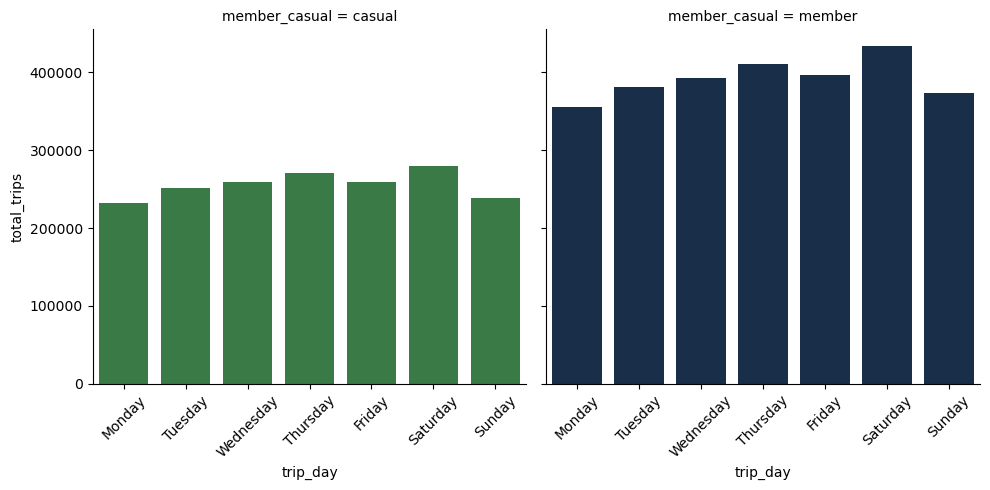

In [24]:
#Create a bar chart visualization that represents the total number of trips taken by each type of user per day
import matplotlib.pyplot as plt1
import seaborn as sns1
g = sns1.FacetGrid(weekly_usage, col='member_casual', hue='member_casual', palette=['#2e8540', '#112e51'], height=5)
g.set_xticklabels(rotation=45)
g.map(sns1.barplot, 'trip_day', 'total_trips')
plt1.show()

C:\Users\Xavier Simmons\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


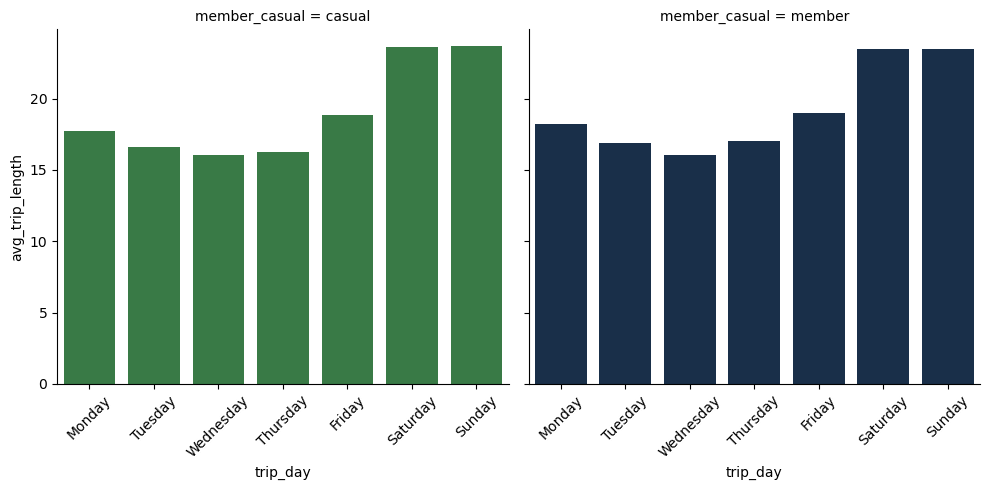

In [25]:
#Create a visualization that shows the average trip length by user type per day
import matplotlib.pyplot as plt2
import seaborn as sns2
g2 = sns2.FacetGrid(weekly_usage, col='member_casual', hue='member_casual', palette=['#2e8540', '#112e51'], height=5)
g2.set_xticklabels(rotation=45)
g2.map(sns2.barplot, 'trip_day', 'avg_trip_length')
plt2.show()

Going further, we see that both casual users and members take longer trips during weekends

In [26]:
#Order dataset by weeks 
week_list = ['01-Jan', '02-Jan', '03-Jan', '04-Jan', '05-Feb', '06-Feb', '07-Feb','08-Feb','09-Feb','10-Mar', '11-Mar', '12-Mar', '13-Mar']
all_data_v5['trip_week'] = pd.Categorical(all_data_v5['trip_week'], categories=week_list, ordered=True)

#Create a new dataset that shows the average trip length data on a weekly basis
per_week_usage = pd.pivot_table(all_data_v5, index=['member_casual', 'trip_week'],
                              aggfunc={'member_casual':np.size, 'ride_length':np.mean}
                              )
per_week_usage = per_week_usage.rename(columns={'member_casual':'total_trips','ride_length':'avg_trip_length'})
per_week_usage = per_week_usage.reset_index()
per_week_usage

,member_casual,trip_week,total_trips,avg_trip_length
0,casual,01-Jan,14855,16.573347
1,casual,02-Jan,20058,14.807889
2,casual,03-Jan,17688,12.617837
3,casual,04-Jan,12281,10.951206
4,casual,05-Feb,7158,15.983007
5,casual,06-Feb,17544,13.012123
6,casual,07-Feb,17809,13.737827
7,casual,08-Feb,17261,15.146603
8,casual,09-Feb,8577,12.282636
9,casual,10-Mar,20401,13.223273


C:\Users\Xavier Simmons\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


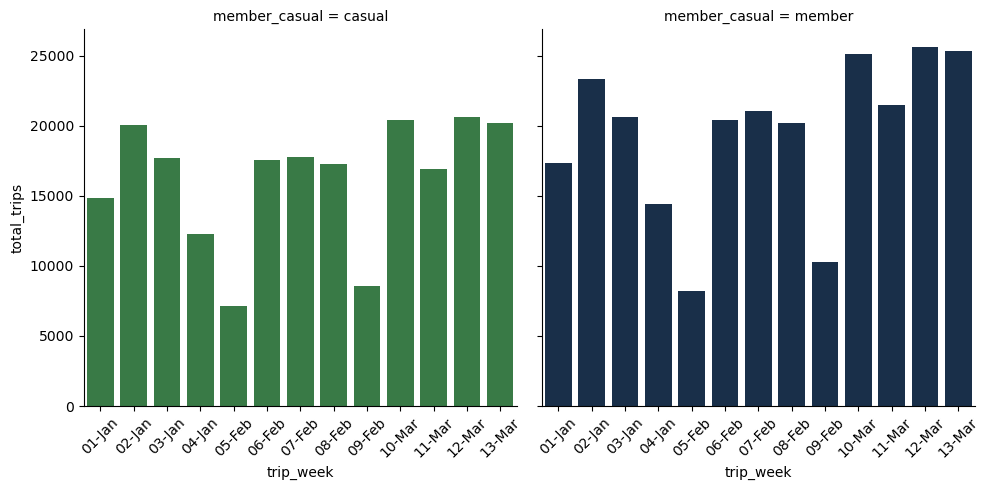

In [27]:
#Create a visualization that shows the total number of trips by user type on a weekly basis over the course of 3 months
import matplotlib.pyplot as plt3
import seaborn as sns3
g3 = sns3.FacetGrid(per_week_usage, col='member_casual', hue='member_casual', palette=['#2e8540', '#112e51'], height=5)
g3.set_xticklabels(rotation=45)
g3.map(sns3.barplot, 'trip_week', 'total_trips')
plt3.show()

C:\Users\Xavier Simmons\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


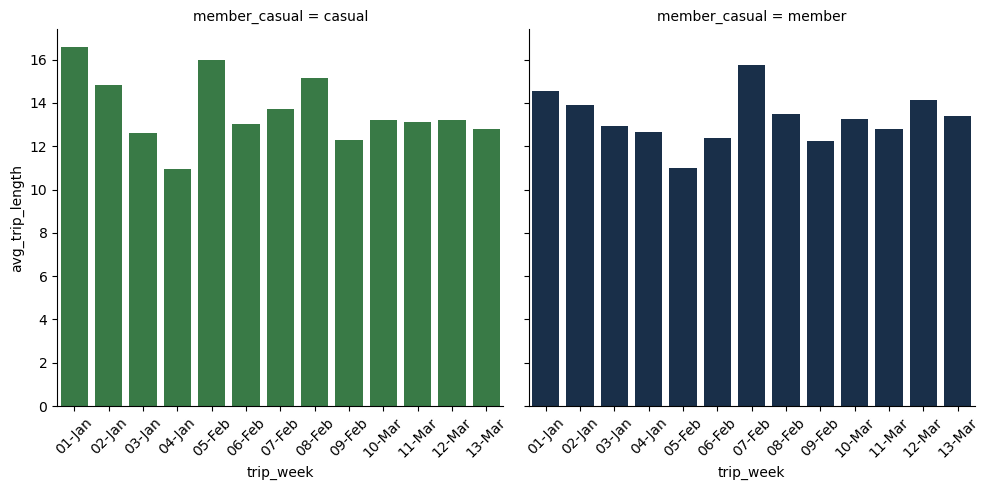

In [28]:
#Create a visualization that shows the average trip length by user type on a weekly basis over the course of 3 months
import matplotlib.pyplot as plt4
import seaborn as sns4
g4 = sns4.FacetGrid(per_week_usage, col='member_casual', hue='member_casual', palette=['#2e8540', '#112e51'], height=5)
g4.set_xticklabels(rotation=45)
g4.map(sns4.barplot, 'trip_week', 'avg_trip_length')
plt4.show()

### Insights

Through analyzing the above data, I was able to gain a few insights about how Cyclistic members and casual riders used the bike-sharing program. 
- Members are more likely to keep Cyclistic bikes for longer periods 

- Members make longer commutes and are more likelyuse the bikes year round, possibly as a primary source of transportation. 

- Cyclistic casual users are more likely to use the bikes for leisure

- There is an increase in weekend ridership among both

- The most popular bike-sharing station for casual users is the Streeter Dr & Grand Ave station. The station is located in a highly attractive and scenic area for both Chicago residents and tourists alike. A number of the more popular start stations amongst casual users were centered in areas adjacent to the Chicago Harbour along Highway 41.

### Conclusion and Recommendations

The ultimate goal of this project is to gain influence amongst casual users of Cyclistic's bike-sharing program to convert them into annual members. Based on the above data and insights gained from it, targeted advertising in those areas and stations where casual users are more likely to frequent should help influence the decisions of casual users. Also, running advertisments during weekends, especially during warmer months should also influence those casual users who prefer to use bikes for leisurely rides and activites.